In [1]:
import os
os.chdir('..')

In [2]:
from deterministic.homogeneous import solve_homogeneous_system, compute_diagram, compute_2D_diagram, compute_2D_botnet
from deterministic.plots import plot_evolution, plot_diagram, plot_2D_diagram, plot_3D_protected, plot_2D_botnet

import numpy as np

# SEIR limit

If we set $\beta_B = 0$ and $\gamma = 0$ we should recover the classical SEIR model in which the epidemic threshold can be estimated following the next-generation matrix approach as [Diekmann et al.](https://doi.org/10.1098%2Frsif.2009.0386):

$$ F = \left(\begin{array}{cc} 0 & \beta_W \\ 0 & 0\end{array}\right),~~
V = \left(\begin{array}{cc} -\epsilon & 0 \\ \epsilon & -\mu\end{array}\right)$$

So that:
$$V^{-1} = \left(\begin{array}{cc} -1/\epsilon & 0 \\ -1/\mu & -1/\mu\end{array}\right)$$

And:

$$FV^{-1} = \left(\begin{array}{cc} \beta_W/\mu & \beta_W/\mu \\ 0 & 0 \end{array}\right)$$

So that the spectral radius is:

$$R_0 = \rho(-FV^{-1}) = \frac{\beta}{\mu}$$

First, we check the time evolution of the system for this limit with $\beta_W = 1$, $\epsilon = 0.1$ and $\mu=0.2$.

In [3]:
beta = {'B': 0, 'W': 1}
epsilon = 0.1
gamma = 0
mu = 0.2

parameters = [beta, epsilon, gamma, mu]

dt = 0.1
result = solve_homogeneous_system(parameters, 200, initial_B=0, dt=dt)

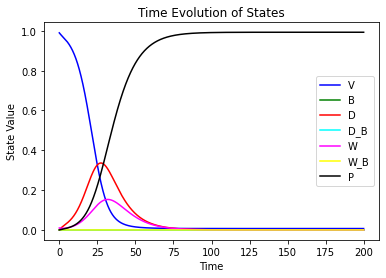

In [4]:
plot_evolution(result, dt=dt)

Now we study the final fraction of $P$ as a function of $\beta$ and some values of $\mu$ with fixed $\epsilon$, together with the theoretical epidemic threshold.

In [5]:
parameters = [{'B': 0, 'W': 0}, 0.1, 0, 0.2]
beta = np.exp(np.linspace(-5, 1, 100))
mu_values = [0.25, 0.50, 0.75, 1.00]
dt = 0.01

data = []
for mu in mu_values:
    parameters[3] = mu
    result = compute_diagram(parameters, 1000, beta_W=beta, initial_W=0.0001, initial_B=0, dt=dt)
    data.append({'legend': f'ep=0.1, gam=0, mu={mu}', 'data': result, 'threshold': mu})

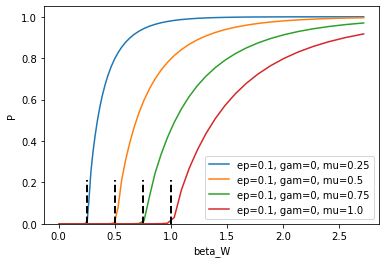

In [6]:
plot_diagram(data)

As expected, it seems that the threshold varies proportionally to $\mu$, so that we can plot the same diagram as a function of $\beta/mu$ instead.

In [7]:
data_norm = data
for idx, mu in enumerate(mu_values):
    data_norm[idx]['data'][:, 0] = data_norm[idx]['data'][:, 0]/mu
    data_norm[idx]['threshold'] = data_norm[idx]['threshold']/mu

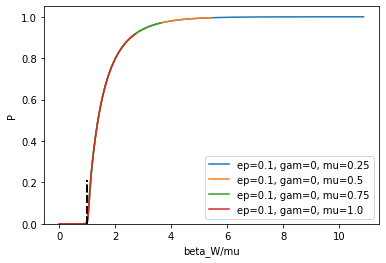

In [8]:
plot_diagram(data_norm, label_x='beta_W/mu')

In fact, we can always rescale time in terms of $\mu$. Hence, from now own we will work always in units of $\mu$.

Let's now look at how this changes as a function of epsilon.

In [9]:
parameters = [{'B': 0, 'W': 0}, 0.1, 0, 1]
beta = np.exp(np.linspace(-5, 1, 100))
epsilon_values = [0.25, 0.50, 0.75, 1.00]
dt = 0.01

data = []
for epsilon in epsilon_values:
    parameters[1] = epsilon
    result = compute_diagram(parameters, 1000, beta_W=beta, initial_W=0.0001, initial_B=0, dt=dt)
    data.append({'legend': f'ep={epsilon}, gam=0', 'data': result, 'threshold': 1})

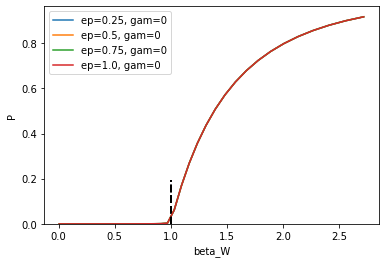

In [10]:
plot_diagram(data)

As expected, the threshold is not affected by the value of $\epsilon$. Furthermore, neither is the overall shape.

# SEIR with latent death

If we now set $\gamma \neq 0$, it is equivalent to a SEIR model in which people in the latent state can spontaneously recover/die. The epidemic threshold in this case can be computed as:

$$ F = \left(\begin{array}{cc} 0 & \beta_W \\ 0 & 0\end{array}\right),~~
V = \left(\begin{array}{cc} -\epsilon - \gamma & 0 \\ \epsilon & -\mu\end{array}\right)$$

So that:
$$V^{-1} = \left(\begin{array}{cc} -1/(\epsilon + \gamma) & 0 \\ -\epsilon/[(\epsilon+\gamma)\mu] & -1/\mu\end{array}\right)$$

And:

$$FV^{-1} = \left(\begin{array}{cc} \beta_W\epsilon/[(\epsilon+\gamma)\mu] & \beta_W/\mu \\ 0 & 0 \end{array}\right)$$

So that the spectral radius is:

$$R_0 = \rho(-FV^{-1}) = \frac{\beta}{\mu} \cdot \frac{\epsilon}{\epsilon + \gamma}$$

Thus, we now see that the epidemic threshold not only depends on the value of $\gamma$ but also on the value of $\epsilon$, which had dissapeared previously. In fact, we can show that it actually depends on the ratio between these quantities.

$$R_0 = \frac{\beta}{\mu} \cdot \frac{\epsilon/\gamma}{\epsilon/\gamma + 1} \equiv \frac{\beta}{\mu} \frac{\epsilon'}{\epsilon'+1}$$

In [11]:
parameters = [{'B': 0, 'W': 0}, 0.2, 0, 1]
beta = np.exp(np.linspace(-5, 2, 100))
dt = 0.01

data = []
for gamma in [0.1, 0.2, 0.4]:
    ep = parameters[1]/gamma
    parameters[2] = gamma
    result = compute_diagram(parameters, 1000, beta_W=beta, initial_W=0.0001, initial_B=0, dt=dt)
    data.append({'legend': f'ep=0.2, gam={gamma}', 'data': result, 'threshold': (ep+1)/ep})

parameters[1] = 0.1
for gamma in [0.05, 0.1, 0.2]:
    ep = parameters[1]/gamma
    parameters[2] = gamma
    result = compute_diagram(parameters, 1000, beta_W=beta, initial_W=0.0001, initial_B=0, dt=dt)
    data.append({'legend': f'ep=0.1, gam={gamma}', 'data': result, 'threshold': (ep+1)/ep})

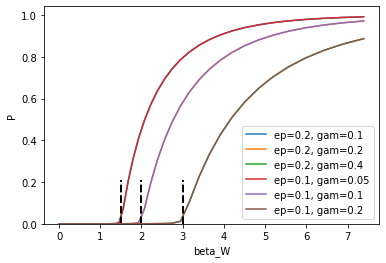

In [12]:
plot_diagram(data)

We see that, indeed, the evolution only depends on the fraction $\epsilon'\equiv\epsilon/\gamma$. Thus, we can conclude that the system can be simply studied in the $\beta,\epsilon'$.

In [13]:
parameters = [{'B': 0, 'W': 0}, 0.1, 1, 1]
beta = np.linspace(0.01, 10, 100)
epsilon = np.linspace(0.01, 2, 100)
dt = 0.01

result = compute_2D_diagram(parameters, 1000, beta_W=beta, epsilon_p=epsilon, initial_W=0.0001, initial_B=0, dt=dt)

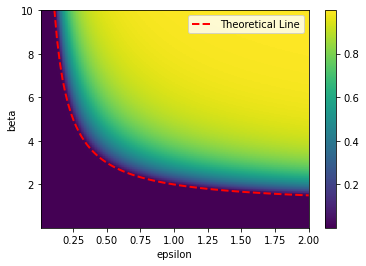

In [14]:
plot_2D_diagram(result)

# Complete model

Since both infections are completely independent, adding the black worm should not alter the diagram. In the following, we reproduce this last 2D diagram but setting $\beta_B\neq 0$.

In [15]:
parameters = [{'B': 0.5, 'W': 0}, 0.1, 1, 1]
beta = np.linspace(0.01, 10, 100)
epsilon = np.linspace(0.01, 2, 100)
dt = 0.01

result = compute_2D_diagram(parameters, 1000, beta_W=beta, epsilon_p=epsilon, initial_W=0.0001, initial_B=0.0001, dt=dt)

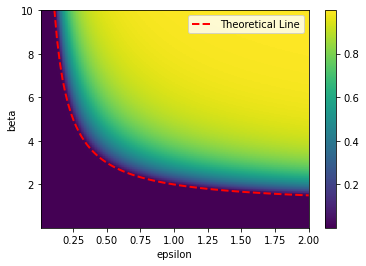

In [16]:
plot_2D_diagram(result)

We can also plot the diagram for $R_0$.

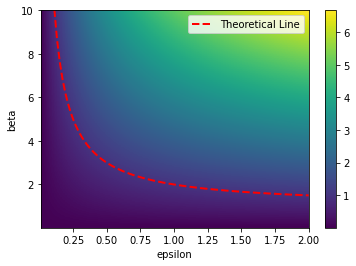

In [17]:
data = result.copy()
data[:, 2] = (data[:, 0]/parameters[3])*((data[:, 1]/parameters[2])/(data[:,1]/parameters[2] + 1))
plot_2D_diagram(data)

We can use these values to test what is the final fraction of the population in the $B$ state given that the final fraction of recovered people in the SEIR model is given by [Britton et al.](https://doi.org/10.1007/978-3-030-30900-8):

$$\rho_P = 1 - e^{-R_0 \rho_P} $$

We can compare the values from this equation to the numerical solutions of the model.

In [18]:
parameters = [{'B': 0.5, 'W': 0}, 0.1, 1, 1]
beta = np.linspace(0.01, 10, 20)
epsilon = np.linspace(0.01, 2, 20)
dt = 0.01

result = compute_2D_diagram(parameters, 1000, beta_W=beta, epsilon_p=epsilon, initial_W=0.0001, initial_B=0.0001, dt=dt)

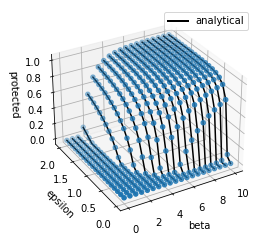

In [19]:
plot_3D_protected(result)

The last elements of the model are the maximum fraction of the population in the $B$ state and the time window in which said fraction is above a certain threshold.

Actually, we can estimate for which set of parameters the white worm will completely prevent the creation of a botnet. For the black worm, if we are near the disease-free state, we can approximate its evolution as [Ma](https://doi.org/10.1016%2Fj.idm.2019.12.009):

$$\dot{\rho}_B \approx \beta_B \rho_B$$

So that in the early phase of the outbreak the size of the botnet will grow as:

$$\rho_B(t) = \rho_B(0) e^{\beta t}$$

In other words, the size of the outbreak grows at rate $\beta_B$.

Similarly, for the white worm, in the early phase of the infection we have:

$$\dot{\rho}_D \approx \beta_W \rho_W - (\epsilon + \gamma) \rho_D$$
$$\dot{\rho}_W \approx \epsilon \rho_D - \mu \rho_W$$

So that the jacobian is:

$$J = \left[\begin{array}{cc} -(\epsilon + \gamma) & \beta_W \\ \epsilon & -\mu \end{array}\right] $$

And its eigenvalues, since it is a 2x2 matrix, can be easily obtained using its trace:

$$\lambda = \frac{tr(J) \pm \sqrt{(tr(J))^2 - 4\det(J)}}{2}$$

$$\Rightarrow \lambda = \frac{-(\epsilon + \gamma + \mu) \pm \sqrt{(-(\epsilon + \gamma + \mu))^2 - 4[(\epsilon + \gamma)\mu - \beta_W \epsilon]}}{2}$$

$$\lambda = \frac{-(\epsilon + \gamma + \mu) + \sqrt{(\epsilon+\gamma)^2 + \mu^2 + 2(\epsilon + \gamma)\mu - 4(\epsilon+\gamma)\mu + 4\beta_w\epsilon}}{2}$$

$$\lambda = \frac{-(\epsilon + \gamma + \mu) + \sqrt{(\epsilon+\gamma -\mu)^2 + 4\beta_w\epsilon}}{2}$$

So that the botnet can only grow if

$$2\beta_B \gt -(\epsilon + \gamma + \mu) + \sqrt{(\epsilon+\gamma -\mu)^2 + 4\beta_W\epsilon}$$

We can test this expression by studying the size of the botnet as a function of $\beta_B$ and $\beta_W$ for several values of $\epsilon$ and $\gamma$ (since we can set $\mu=1$ as previously discussed).

In [20]:
parameters = [{'B': 0.5, 'W': 0}, 1, 1, 1]
beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

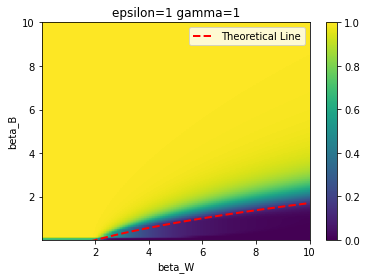

In [21]:
plot_2D_botnet(result)

In [22]:
parameters = [{'B': 0.5, 'W': 0}, 0.5, 1, 1]
beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

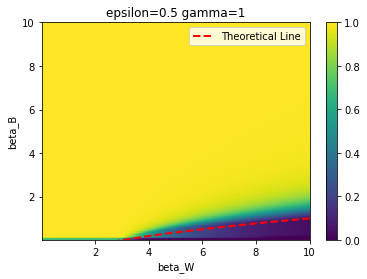

In [23]:
plot_2D_botnet(result, epsilon = 0.5)

In [24]:
parameters = [{'B': 0.5, 'W': 0}, 2, 1, 1]
beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

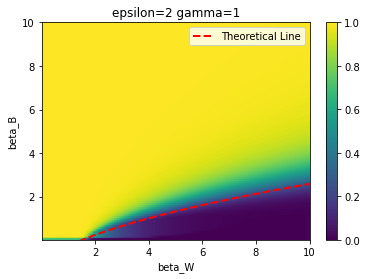

In [25]:
plot_2D_botnet(result, epsilon = 2)

In [26]:
parameters = [{'B': 0.5, 'W': 0}, 2, 0.1, 1]
beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

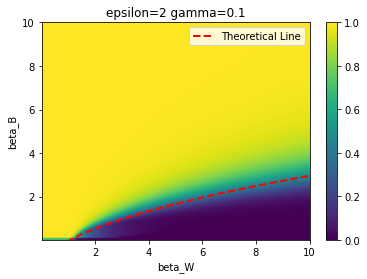

In [27]:
plot_2D_botnet(result, epsilon=2, gamma=0.1)

Given that the approximation works very well, we can focus on studying this threshold since it is the one that will ensure us that the botnet will not exist at any point. This way, we can easily explore its evolution for different values of $\epsilon$ and $\gamma$.

In the following, we explore the model with $\gamma = 1$.

In [115]:
import matplotlib.pyplot as plt


def plot_botnet_threshold(beta_W_max, epsilon, gamma, mu, th=False):
    """Plot the botnet threshold."""

    values_list = epsilon if isinstance(epsilon, np.ndarray) else gamma
    
    fig, ax = plt.subplots()
    
    # Create a color gradient based on the values
    colors = plt.cm.viridis(np.linspace(np.min(values_list), np.max(values_list), len(values_list)))

    # Calculate beta_B values for each value
    beta_W_values = np.linspace(0, beta_W_max, 100)
    for value, color in zip(values_list, colors):
        ep = value if isinstance(epsilon, np.ndarray) else epsilon
        ga = value if isinstance(gamma, np.ndarray) else gamma

        beta_B_values = 0.5 * (-(ep + mu + ga) +
                               np.sqrt((ep + ga - mu) ** 2 + 4 * beta_W_values * ep))

        mask = beta_B_values >= 0
        ax.plot(beta_W_values[mask], beta_B_values[mask], color=color)

    # Set x-axis and y-axis labels
    ax.set_xlabel('beta_W')
    ax.set_ylabel('beta_B')
    
    ax.set_xlim(0, beta_W_max)
    ax.set_xlim(0)
    
    # Plot the theoretical line
    thresholds = mu * ((epsilon/gamma) + 1) / (epsilon/gamma)
    ax.plot(thresholds, [0]*len(thresholds), marker='o', linestyle='None', color='black', label='threshold')
    
    if th:
        ax.plot([0 + mu, beta_W_max + mu], [0, beta_W_max], 'k--')

    # Create a color bar for epsilon values
    label = 'epsilon' if isinstance(epsilon, np.ndarray) else 'gamma'

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
    sm.set_array(values_list)
    cbar = plt.colorbar(sm)
    cbar.set_label(label)

    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()


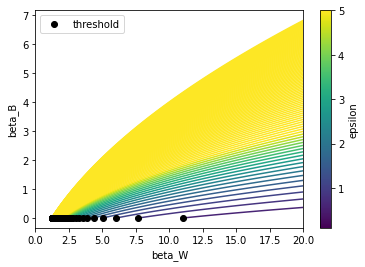

In [116]:
plot_botnet_threshold(20, np.linspace(0.1, 5, 100), gamma = 1, mu = 1)

As we can see, the smaller the value of $\epsilon$, the larger $\beta_W$ has to bee to prevent the appearance of a botnet. In the limit in which $\epsilon \rightarrow \infty$ we should recover the SIR model in which the growth rate is simply $\beta_W - \mu$. Thus, the botnet may be prevented if $\beta_W > \beta_B + \mu = \beta_B + 1$.

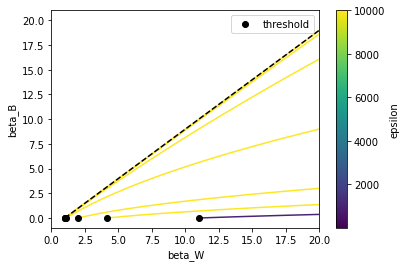

In [117]:
plot_botnet_threshold(20, np.array([10**x for x in [-1, -0.5, 0, 1, 2, 3, 4]]), gamma = 1, mu = 1, th=True)

We can now explore the role of $\gamma$ with fixed $\epsilon=1$:

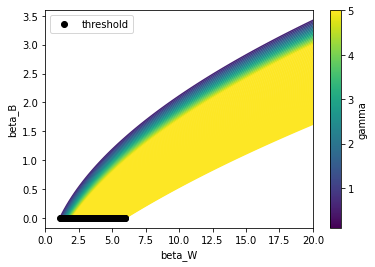

In [118]:
plot_botnet_threshold(20, epsilon=1, gamma=np.linspace(0.1, 5, 100), mu=1)

And, for instance, for $\epsilon=10$:

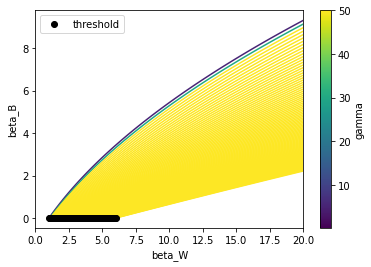

In [120]:
plot_botnet_threshold(20, epsilon=10, gamma=np.linspace(0.1, 50, 100), mu=1)

As expected, the larger the value of $\gamma$, the harder it is to prevent the aparition of a botnet. 

# Comparison with the complete graph

Now that we have a good understanding of the model, we can try to reproduce some of the results with the Gillespie algorithm on the complete graph to check if it's correct. In particular, we will focus on the final fraction of protected nodes as a function of $\beta_W$ and $\epsilon$, and the size of the botnet as a function of $\beta_B$ and $\beta_W$.

In [7]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('protected_CG_N100_*'):

    bW = float(file_path.stem.split('_bW')[1].split('_')[0])
    e = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    protected = [x for x in data_list if x > 0.1]
    protected = np.median(protected) if len(protected) else 0

    results = np.vstack((results,
                         np.array([bW, e, protected])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

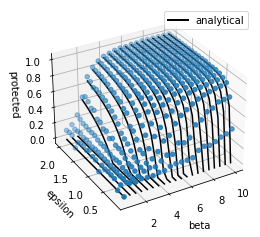

In [8]:
plot_3D_protected(results)

In [12]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('botnet_CG_N100_*'):

    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    protected = [x for x in data_list if x > 0.0]
    protected = np.median(protected) if len(protected) else 0

    results = np.vstack((results,
                         np.array([bB, bW, protected])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

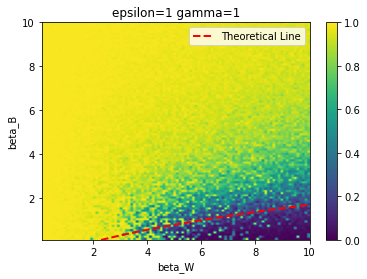

In [13]:
plot_2D_botnet(results)